# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 10
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = (x - a/2)^2 + (y - a/2)^2
Apot(x, y, z) = .2 * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
C = 500.0
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.584869e+01     1.264281e+01
 * time: 0.00138092041015625
     1     3.054781e+01     7.096542e+00
 * time: 0.006786823272705078
     2     2.580164e+01     3.992490e+00
 * time: 0.012631893157958984
     3     2.192577e+01     2.183280e+00
 * time: 0.017592906951904297
     4     2.007206e+01     3.498928e+00
 * time: 0.022746801376342773
     5     1.931167e+01     1.595468e+00
 * time: 0.027925968170166016
     6     1.907587e+01     2.420429e+00
 * time: 0.032034873962402344
     7     1.867468e+01     1.142696e+00
 * time: 0.03615283966064453
     8     1.831310e+01     1.455447e+00
 * time: 0.04024982452392578
     9     1.808553e+01     9.752148e-01
 * time: 0.04451298713684082
    10     1.794596e+01     5.972106e-01
 * time: 0.04868483543395996
    11     1.785661e+01     5.716723e-01
 * time: 0.05273580551147461
    12     1.778390e+01     4.360882e-01
 * time: 0.056849002838134766
    13     1.776159e+01     1.243854e+00
 

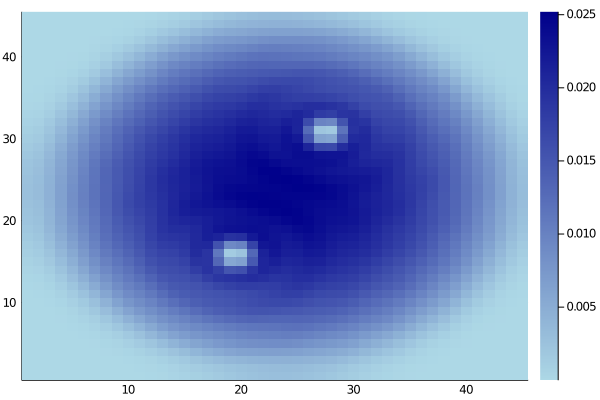

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)